In [15]:
## Xgboost算法辛烷损失值进行预测
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, roc_auc_score
import time
import numpy as np
import xgboost as xgb
from xgboost import plot_importance,plot_tree
from sklearn.metrics import accuracy_score
import os
plt.rcParams["font.sans-serif"] = "SimHei"  ## 设置中文显示
plt.rcParams['axes.unicode_minus']=False    # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号
%matplotlib inline

In [3]:
# 加载用于回归问题的数据集
data = pd.read_excel('D:\桌面\数据挖掘-汽油辛烷值损失模型优化\暑期模拟-3-2022-08-18\模拟练习-3 B题 汽油辛烷值建模\降维后特征.xlsx')

In [8]:
# 划分为数据集和测试集
X = np.array(data.iloc[:,0:15])
y = np.array(data.iloc[:,16])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

xgb_train = xgb.DMatrix(X_train,label=y_train)
xgb_test = xgb.DMatrix(X_test,label=y_test)


In [11]:
# 模型建立与预测
print("回归,RON Lost:")
X = np.array(data.iloc[:,0:15])
y = np.array(data.iloc[:,16])
kf = KFold(n_splits=50, shuffle=True)
for i,(train_idx,test_idx) in enumerate(kf.split(X)):
    model = xgb.XGBRegressor().fit(X[train_idx],y[train_idx])
    preds = model.predict(X[test_idx])
    labels = y[test_idx]
    print("kfold-%d MSE为: %f"%(i,mean_squared_error(labels,preds)))

回归,RON Lost:
kfold-0 MSE为: 0.005069
kfold-1 MSE为: 0.005599
kfold-2 MSE为: 0.008811
kfold-3 MSE为: 0.006455
kfold-4 MSE为: 0.006444
kfold-5 MSE为: 0.006229
kfold-6 MSE为: 0.010887
kfold-7 MSE为: 0.012035
kfold-8 MSE为: 0.008358
kfold-9 MSE为: 0.006456
kfold-10 MSE为: 0.019967
kfold-11 MSE为: 0.001828
kfold-12 MSE为: 0.001685
kfold-13 MSE为: 0.010969
kfold-14 MSE为: 0.015573
kfold-15 MSE为: 0.004742
kfold-16 MSE为: 0.033882
kfold-17 MSE为: 0.010420
kfold-18 MSE为: 0.005587
kfold-19 MSE为: 0.004936
kfold-20 MSE为: 0.010738
kfold-21 MSE为: 0.007654
kfold-22 MSE为: 0.002741
kfold-23 MSE为: 0.011437
kfold-24 MSE为: 0.010457
kfold-25 MSE为: 0.399395
kfold-26 MSE为: 0.014496
kfold-27 MSE为: 0.009199
kfold-28 MSE为: 0.036273
kfold-29 MSE为: 0.031154
kfold-30 MSE为: 0.014643
kfold-31 MSE为: 0.009266
kfold-32 MSE为: 0.010429
kfold-33 MSE为: 0.052434
kfold-34 MSE为: 0.006182
kfold-35 MSE为: 0.004674
kfold-36 MSE为: 0.011302
kfold-37 MSE为: 0.019279
kfold-38 MSE为: 0.008722
kfold-39 MSE为: 0.016304
kfold-40 MSE为: 0.007610
kfold-41 MSE为

,真实值,预测值
0,88.942291,89.0
1,89.651817,89.6
2,90.325157,90.3
3,90.650688,90.6
4,90.266327,90.1


<AxesSubplot:>

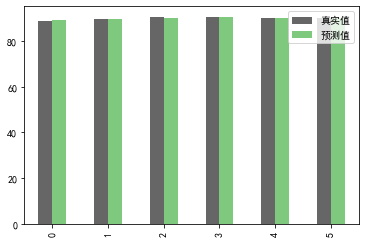

In [16]:
# 可视化Xgboost算法预测效果
df = pd.DataFrame([preds,labels]).T
df.columns = ['真实值','预测值']
display(df.head())
# 采用pandas内置画图工具快速可视化
df.plot(kind='bar',legend=1,cmap='Accent_r')

In [ ]:
## 模型评估：
## 通过所建立的XGBoost模型的loss值与测试集可视化结果我们可以看到：
    # 经过50批次运行，MSE低至0.001685，精度较高
    # 经过可视化，结果显示预测值均维持在较高精度，甚至基本达到水平